# Perform Exploratory Data Analysis on 'Indian Premiere League'

# Introduction:
The Indian Premier League (IPL) is a professional Twenty20 cricket league in India usually contested between March and May of every year by eight teams representing eight different cities or states in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2007. The IPL has an exclusive window in ICC Future Tours Programme.

The IPL is the most-attended cricket league in the world and in 2014 was ranked sixth by average attendance among all sports leagues.In 2010, the IPL became the first sporting event in the world to be broadcast live on YouTube.The brand value of the IPL in 2019 was ₹475 billion, according to Duff & Phelps. According to BCCI, the 2015 IPL season contributed ₹11.5 billion to the GDP of the Indian economy.

Here in this notebook,i tried to explore different datasets about IPL (from 2008 to 2019) and tried to gain some key insights about this wonderful tournament.

# Objective:
● Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

● As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

● Suggest teams or players a company should endorse for its products.

# Importing all the necessary libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install openpyxl --quiet
from matplotlib import style


# Loading all the datasets

In [9]:
match_data=pd.read_csv('C:/Users/Pritam/Desktop/DBA/IPL/matches.csv')
home_away_data=pd.read_csv('C:/Users/Pritam/Desktop/DBA/IPL/teamwise_home_and_away.csv')
deliveries_data=pd.read_csv('C:/Users/Pritam/Desktop/DBA/IPL/deliveries.csv')
runs_data=pd.read_csv('C:/Users/Pritam/Desktop/DBA/IPL/most_runs_average_strikerate.csv')
teams_data=pd.read_csv('C:/Users/Pritam/Desktop/DBA/IPL/teams.csv')
Players_data=pd.read_excel('C:/Users/Pritam/Desktop/DBA/IPL/Players.xlsx')

# Displaying part of all the datasets

#### 1.Match Data
- First 5 Records

In [10]:
match_data.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### 2. Numer of Rows & Columns

In [11]:
match_data.shape

(756, 18)

#### 3. Frequency Of Most Man Of The Match 

In [12]:
match_data['player_of_match'].value_counts().head(1)

CH Gayle    21
Name: player_of_match, dtype: int64

#### 4. Top 10 players with most man of the match

In [13]:
match_data['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

#####  5. BarPlot of Top 10 players with most man of the match

In [14]:
match_data['player_of_match'].value_counts()[0:5].keys()

Index(['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'DA Warner', 'RG Sharma'], dtype='object')

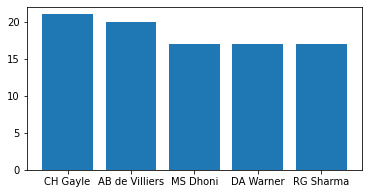

In [15]:
plt.figure(figsize=(6,3))
plt.bar(list(match_data['player_of_match'].value_counts()[0:5].keys()[0:5]), list(match_data['player_of_match'].value_counts()[0:5]))
plt.show()

#### 6.  Frequeny of result column

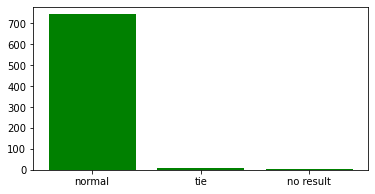

In [16]:
match_data['result'].value_counts()
plt.figure(figsize=(6,3))
plt.bar(list(match_data['result'].value_counts().keys()[0:5]), list(match_data['result'].value_counts()), color='green')
plt.show()

#### 7. Frequeny of Toss Winners

In [17]:
match_data['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

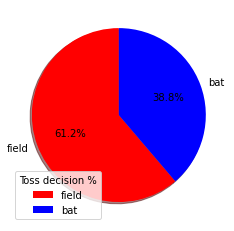

In [22]:
y=np.array(match_data['toss_decision'].value_counts())
l=['field','bat']
c=['r','b']

plt.pie(y,labels=l,colors=c,autopct='%1.1f%%',startangle=90,shadow=True)
plt.legend(loc='lower left',title='Toss decision %')
plt.show()

#### 8. Records of team who decided to bat first

In [23]:
battingFirst = match_data[match_data['win_by_runs']!=0]
battingFirst.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


#### Making histogram

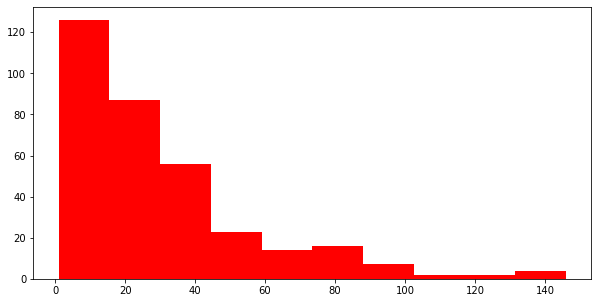

In [24]:
plt.figure(figsize=(10,5))
plt.hist(battingFirst['win_by_runs'], color='red')
plt.show()

#### 9. Make barplot for top 5 teams with most wins after batting first 

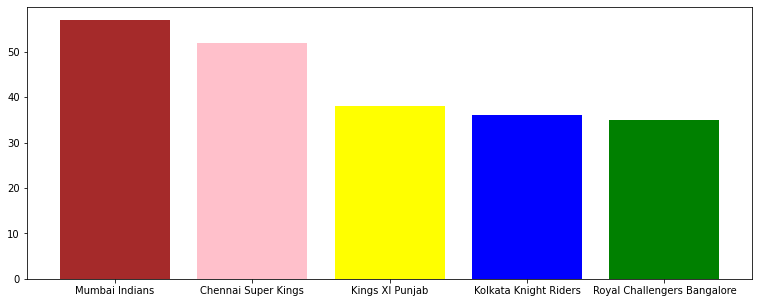

In [25]:
plt.figure(figsize=(13,5))
plt.bar(battingFirst['winner'].value_counts().keys()[0:5],battingFirst['winner'].value_counts()[0:5], color=['brown','pink','yellow','blue','green'])
plt.show()


#### Make piechart for BATTING first with winning percentage

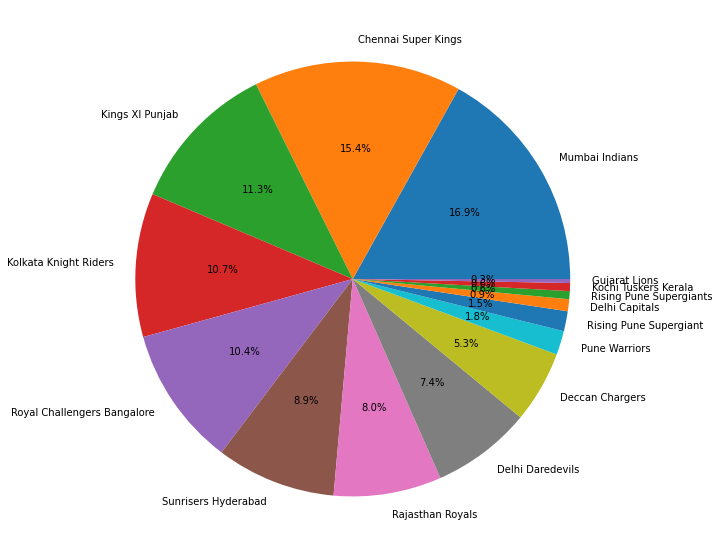

In [26]:
plt.figure(figsize=(10,10))
plt.pie(list(battingFirst['winner'].value_counts()),labels=list(battingFirst['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

#### 10. Records of team who decided to ball first and won 

In [27]:
ballFirst=match_data[match_data['win_by_wickets']!=0]
ballFirst['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  6
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

#### BAR Plot

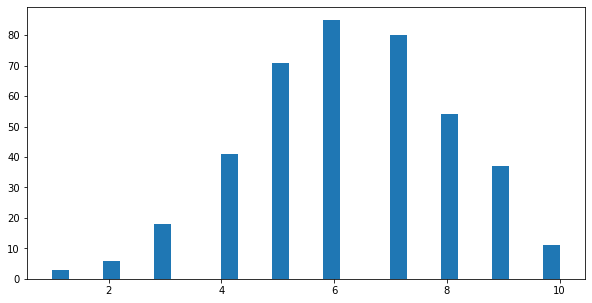

In [28]:
plt.figure(figsize=(10,5))
plt.hist(ballFirst['win_by_wickets'], bins=30)
plt.show()

#### Make barplot for top 5 teams with most wins after balling first 

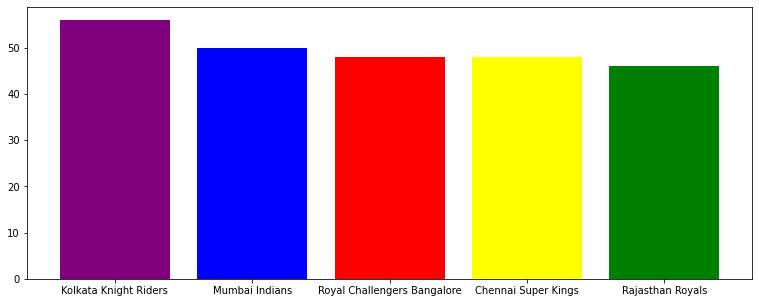

In [29]:
plt.figure(figsize=(13,5))
plt.bar(ballFirst['winner'].value_counts().keys()[0:5],ballFirst['winner'].value_counts()[0:5], color=['purple','blue','red','yellow','green'])
plt.show()

#### 11. Number of match played each season

In [30]:
match_data['Season'].value_counts().sort_values()

IPL-2009    57
IPL-2008    58
IPL-2015    59
IPL-2017    59
IPL-2014    60
IPL-2018    60
IPL-2010    60
IPL-2016    60
IPL-2019    60
IPL-2011    73
IPL-2012    74
IPL-2013    76
Name: Season, dtype: int64

### Home and away wins data
- how many matches does a team won while playing in home stadium and away and their percentage win-loss

In [31]:
home_away_data.head(14)

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


### Runs data

- Details about the runs scored by every batter along with their strike rate and average

In [32]:
runs_data.head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


### Teams Data

- Name of all the teams that have played in the history of ipl


In [33]:
teams_data.head(15)

,team1
0,Pune Warriors
1,Kolkata Knight Riders
2,Rajasthan Royals
3,Kochi Tuskers Kerala
4,Gujarat Lions
5,Chennai Super Kings
6,Rising Pune Supergiants
7,Delhi Daredevils
8,Deccan Chargers
9,Delhi Capitals


### Players Data

- details of the player including their dob,batting_hand and the country they belonged

In [34]:
Players_data.head(5)

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


# Time for some analysis & insights gatherings

In [35]:
match_data.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Important Note:

- Deccan Chargers was renamed to Sunrisers Hyderabad , Delhi Daredevils was renamed to Delhi Capitals,Pune Warriors was rebranded to Rising Pune Supergiants.so lets change all the old names to current existing team names.



In [36]:
def name_changer(data):
    if data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'
    return data 

In [13]:
match_data['team1']=match_data['team1'].apply(lambda x:name_changer(x))
match_data['team2']=match_data['team2'].apply(lambda x:name_changer(x))
match_data['toss_winner']=match_data['toss_winner'].apply(lambda x:name_changer(x))
match_data['winner']=match_data['winner'].apply(lambda x:name_changer(x))


## Total wins picked by every teams so far

In [37]:
match_data.winner.value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

<AxesSubplot:>

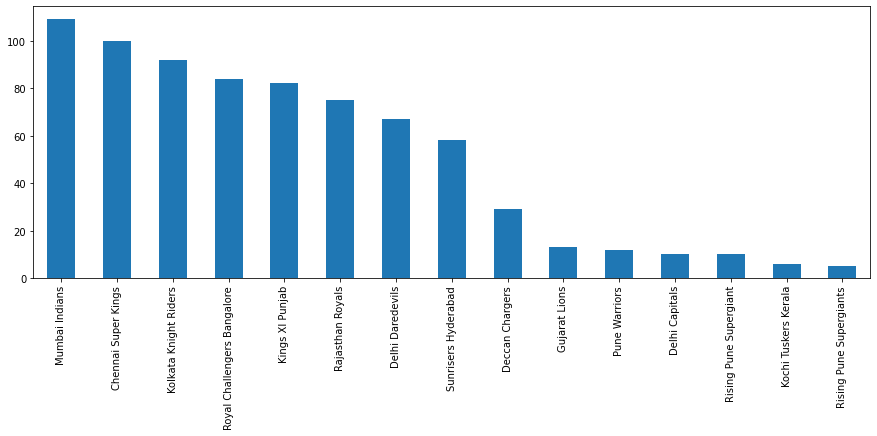

In [38]:
plt.figure(figsize=(15,5))
match_wins=match_data.winner.value_counts()
match_data.winner.value_counts().plot.bar()

#### - Conclusion: Most successful team in ipl history is Mumbai Indians with 109 wins

# Total matches played by team so far

In [39]:
tot_match=match_data.team1.value_counts()+match_data.team2.value_counts()
tot_match.sort_values(ascending=False)

Mumbai Indians                 187
Royal Challengers Bangalore    180
Kolkata Knight Riders          178
Kings XI Punjab                176
Chennai Super Kings            164
Delhi Daredevils               161
Rajasthan Royals               147
Sunrisers Hyderabad            108
Deccan Chargers                 75
Pune Warriors                   46
Gujarat Lions                   30
Rising Pune Supergiant          16
Delhi Capitals                  16
Rising Pune Supergiants         14
Kochi Tuskers Kerala            14
dtype: int64

<AxesSubplot:>

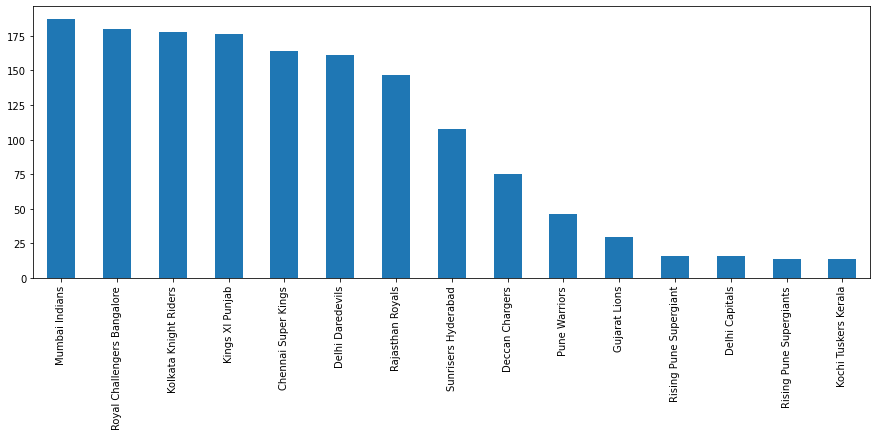

In [40]:
plt.figure(figsize=(15,5))
tot_match.sort_values(ascending=False).plot.bar()

### Conclusion:
- Mumbai Indians has played the most matches of 187.This is understandable because since Mumbai Indians(MI) has won most matches so they surely survived enough to play more knockout matches which adds up to this.

# % of match win by teams

In [41]:
win_per=(match_wins/tot_match)*100
win_per.sort_values(ascending=False)

Rising Pune Supergiant         62.500000
Delhi Capitals                 62.500000
Chennai Super Kings            60.975610
Mumbai Indians                 58.288770
Sunrisers Hyderabad            53.703704
Kolkata Knight Riders          51.685393
Rajasthan Royals               51.020408
Royal Challengers Bangalore    46.666667
Kings XI Punjab                46.590909
Gujarat Lions                  43.333333
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
dtype: float64

<AxesSubplot:>

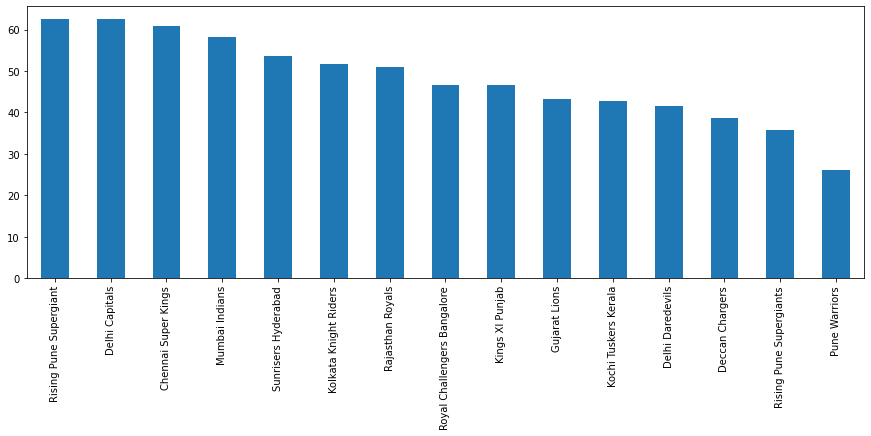

In [42]:
plt.figure(figsize=(15,5))

win_per.sort_values(ascending=False).plot.bar()

### Conclusion:
This is very interesting finding, although MI beats others in terms most wins but in terms of % win rate CSK is highest with almost 60% whereas Mi is around 58%.CSk's win chamce/probability is highest.

### Most no of Player of the match awarded (Top 10)

In [43]:
match_data.player_of_match.value_counts().head(10)

CH Gayle          21
AB de Villiers    20
MS Dhoni          17
DA Warner         17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

<AxesSubplot:>

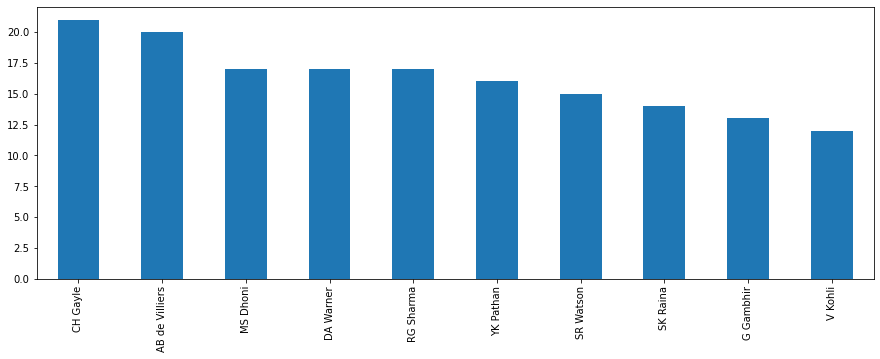

In [44]:
plt.figure(figsize=(15,5))
match_data.player_of_match.value_counts().head(10).plot.bar()

### Conclusion:
Chris Gayle is the most successful player in ipl history with 21 times Player of the match awarded followed by AB Devillers with 20 times

### Total no of matches hosted by each stadium so far

In [45]:
match_data.venue.value_counts()

Eden Gardens                                            77
M Chinnaswamy Stadium                                   73
Wankhede Stadium                                        73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Brabourne Stadium                                       11
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     

<AxesSubplot:>

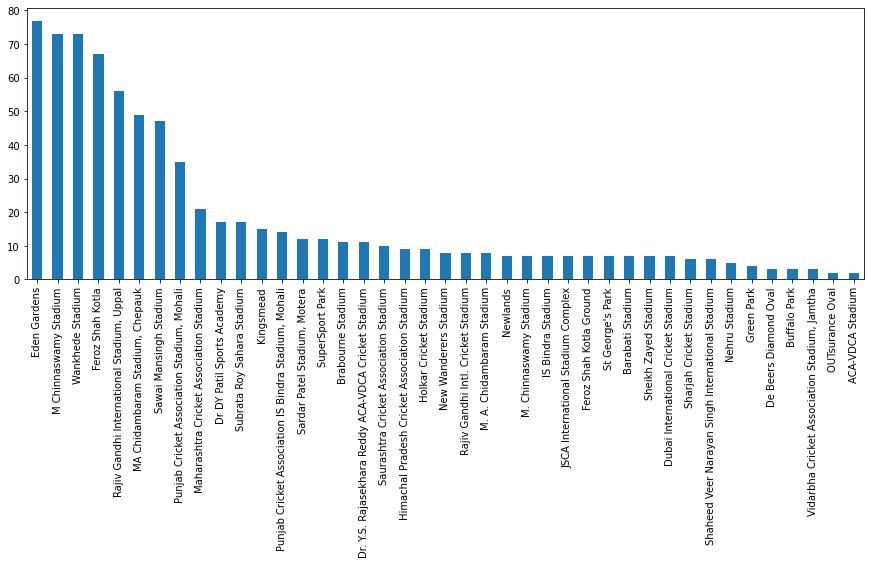

In [46]:
plt.figure(figsize=(15,5))
match_data.venue.value_counts().plot.bar()

### Conclusion:
Eden Gardens of kolkata has hosted most no matches of ipl of 77

### Total no umpire caps for every umpires so far (Top 30)

In [24]:
um=match_data.umpire1.value_counts()+match_data.umpire2.value_counts()
um.sort_values(ascending=False).head(30)

S Ravi                   106.0
HDPK Dharmasena           87.0
C Shamshuddin             73.0
AK Chaudhary              58.0
SJA Taufel                55.0
M Erasmus                 54.0
Nitin Menon               42.0
BR Doctrove               42.0
RE Koertzen               41.0
CK Nandan                 41.0
VA Kulkarni               39.0
BNJ Oxenford              32.0
SK Tarapore               31.0
S Asnani                  30.0
DJ Harper                 27.0
AM Saheba                 26.0
NJ Llong                  25.0
CB Gaffaney               24.0
K Hariharan               21.0
Anil Chaudhary            21.0
RK Illingworth            19.0
JD Cloete                 17.0
BG Jerling                17.0
SS Hazare                 17.0
A Nand Kishore            16.0
O Nandan                  16.0
S Das                     15.0
K Srinath                 15.0
Bruce Oxenford            15.0
KN Ananthapadmanabhan     14.0
dtype: float64

In [47]:
plt.figure(figsize=(15,5))
um.sort_values(ascending=False).head(30).plot.bar()

NameError: name 'um' is not defined

<Figure size 1080x360 with 0 Axes>

### Conclusion:
Umpire S Ravi has capped most matches as umpire with 106 matches ,followed by HDPK Dharmasena with 87 matches

In [26]:
home_away_data

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


In [48]:
home_away_data=home_away_data.append({"team":"Delhi_Capitals","home_wins":"28","away_wins":"49","home_matches":"78","away_matches":"99",
                "home_win_percentage":"42.36111","away_win_percentage":"58.50000"},ignore_index=True)

home_away_data=home_away_data.append({"team":"Sunrisers Hyderabad","home_wins":"48","away_wins":"39","home_matches":"106","away_matches":"77",
                "home_win_percentage":"44.73","away_win_percentage":"48.29"},ignore_index=True)
home_away_data=home_away_data.append({"team":"Rising Pune Supergiants","home_wins":"11","away_wins":"11","home_matches":"28","away_matches":"34",
                "home_win_percentage":"39.28","away_win_percentage":"32.35"},ignore_index=True)
home_away_data.drop([0,3,4,6,10,11],axis=0,inplace=True)


In [49]:
home_away_data['home_win_percentage']=home_away_data['home_win_percentage'].astype('float')
home_away_data['away_win_percentage']=home_away_data['away_win_percentage'].astype('float')
home_away_data

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632
12,Kochi Tuskers Kerala,2,4,7,7,28.571429,57.142857
13,Gujarat Lions,1,12,14,16,7.142857,75.000000
14,Delhi_Capitals,28,49,78,99,42.361110,58.500000
15,Sunrisers Hyderabad,48,39,106,77,44.730000,48.290000


### Most successful team in home condition

In [50]:
home_wins=home_away_data[['team','home_win_percentage']]
home_wins.sort_values('home_win_percentage',ascending=False)

,team,home_win_percentage
1,Mumbai Indians,57.425743
2,Chennai Super Kings,57.303371
15,Sunrisers Hyderabad,44.730000
5,Rajasthan Royals,43.283582
14,Delhi_Capitals,42.361110
7,Kings XI Punjab,41.758242
8,Royal Challengers Bangalore,41.176471
9,Kolkata Knight Riders,40.963855
16,Rising Pune Supergiants,39.280000
12,Kochi Tuskers Kerala,28.571429


<AxesSubplot:xlabel='team'>

<Figure size 1440x360 with 0 Axes>

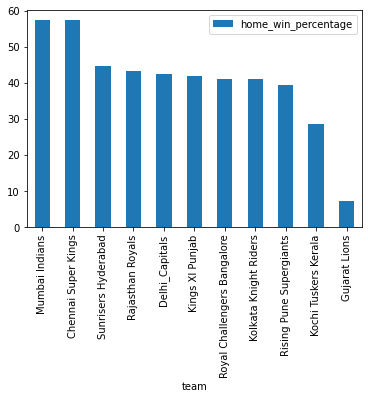

In [51]:
plt.figure(figsize=(20,5))
home_wins.sort_values('home_win_percentage',ascending=False).plot.bar(x='team',y='home_win_percentage')

### Conclusion:
Most successful team in home condution is Mumbai Indians with win percentage of 57.42 

## Most successful team in away condition

In [52]:
away_wins=home_away_data[['team','away_win_percentage']]
away_wins.sort_values('away_win_percentage',ascending=False)

,team,away_win_percentage
13,Gujarat Lions,75.000000
2,Chennai Super Kings,65.333333
9,Kolkata Knight Riders,61.052632
1,Mumbai Indians,59.302326
14,Delhi_Capitals,58.500000
5,Rajasthan Royals,57.500000
12,Kochi Tuskers Kerala,57.142857
7,Kings XI Punjab,51.764706
8,Royal Challengers Bangalore,51.578947
15,Sunrisers Hyderabad,48.290000


<AxesSubplot:xlabel='team'>

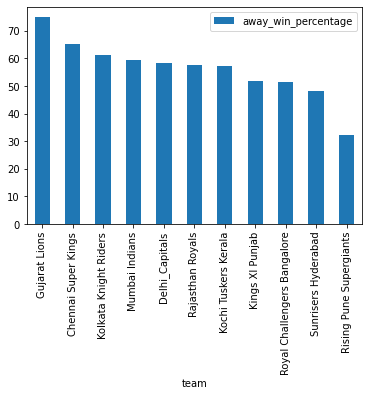

In [53]:
away_wins.sort_values('away_win_percentage',ascending=False).plot.bar(x='team',y='away_win_percentage')


### Conclusion:
Although Gujrat lion has the highest away win percentage but it has played very less matches in comparison to teams like CSK,MI or KKR. So here the winner is CSK with a staggering 65.33% of away wins.

## Most Runs scored by Top 10 batters

In [54]:
runs_data.sort_values('total_runs',ascending=False).head(10)

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
5,CH Gayle,4525,110,2972,41.136364,152.254374
6,MS Dhoni,4450,118,3206,37.711864,138.802246
7,RV Uthappa,4420,156,3381,28.333333,130.730553
8,AB de Villiers,4414,104,2902,42.442308,152.101999
9,G Gambhir,4219,134,3400,31.485075,124.088235


<AxesSubplot:xlabel='batsman'>

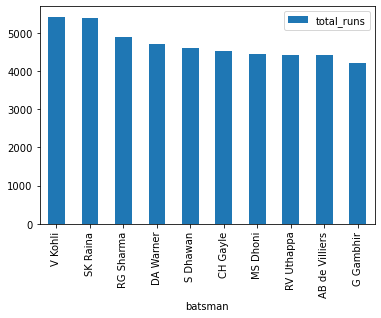

In [55]:
runs_data.sort_values('total_runs',ascending=False).head(10).plot.bar(x='batsman',y='total_runs')

### Conclusion:
Virat Kohli has scored the highest number of runs in ipl history of 5426 ipl runs

# Some Key Findings of this analysis/Conclusion
- Most successful team in ipl history (in terms of match wins) is Mumbai Indians with highest match wins of 109.
- But highest win percentage belongs to Chennai Super Kings of 60.97% whereas MI's win percentage is 58.28% so it is highly debatable which team is best.MI has highest wins but CSK kas highest win percentage rate.
- MI has played highest no of matches of 187.
- Highest no of "Player Of The Match" has received by Chris Gayle for 21 times. AB Devillers is the second best for 20 times.
- Eden Garden of kolkata has hosted highest no of ipl matches of 77 matches and second position goes to Chinnaswamy Stadium of Bangalore with match count of 73.
- Umpire S Ravi has recorded highest no of times for being umpire for 106 matches and second highest belongs to Umpire HDPK Dharmasena for 87 matches.
- Most successful team in home condition is Mumbai Indians with win percentage of 57.42%.
- Most successful team in away condition is Chennai Super Kings with win percentage of 65.33%.
- Highest run scorer of ipl is virat kohli with 5426 ipl runs.